In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
perturbation_list = [0.1, 0.2, 0.5, 0.8, 1.0, 1.3, 1.5, 1.8, 2.0, 2.3, 2.5]

results = []
for perturbation in perturbation_list:
    folder_path = str(perturbation)
    file_list = os.listdir(folder_path)
    
    for file_name in file_list:
        if file_name.endswith('.npz'):
            file = np.load(os.path.join(folder_path, file_name))
            results.append([perturbation, file['bandgap_contrast'], file['exit_flag'], file['forbidden_states_init'], file['forbidden_states_final']])
        
    
results = np.array(results)
print(results)

[[  0.1         -0.61220363   1.           3.           3.        ]
 [  0.1         -1.23840753   1.           3.           1.        ]
 [  0.1         -0.8208954    1.           1.           1.        ]
 [  0.1         -0.78937358   1.           2.           2.        ]
 [  0.1         -0.9537255    1.           4.           3.        ]
 [  0.1         -0.68796989   1.           4.           4.        ]
 [  0.1         -1.31020477   1.           2.           2.        ]
 [  0.1         -1.01997501   1.           2.           1.        ]
 [  0.1         -1.686151     1.           3.           2.        ]
 [  0.1         -0.83242929   1.           1.           1.        ]
 [  0.1         -1.12390108   1.           1.           1.        ]
 [  0.1         -1.34387854   1.           5.           4.        ]
 [  0.1         -1.6158041    0.           4.           4.        ]
 [  0.1         -0.94886682   1.           1.           1.        ]
 [  0.1         -1.31180942   0.           3.   

/home/bylehn/ipykernel_698881/781610833.py:1: RuntimeWarning: invalid value encountered in divide
  plt.scatter(results[:,0],results[:,4]/results[:,3], c=results[:,2], marker='.')


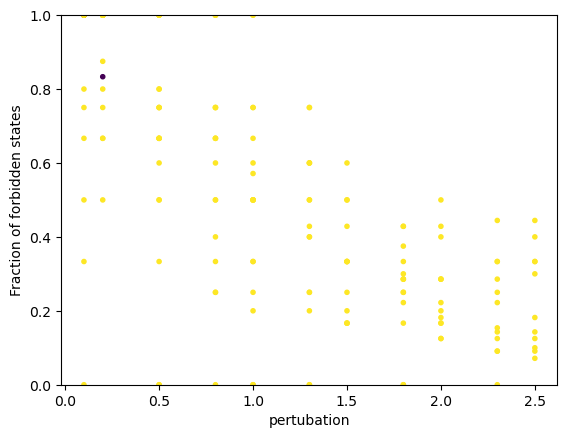

In [3]:
plt.scatter(results[:,0],results[:,4]/results[:,3], c=results[:,2], marker='.')
plt.ylim(0,1)
plt.xlabel('pertubation')
plt.ylabel('Fraction of forbidden states')
#plt.gca().set_aspect(10, adjustable='box')

plt.savefig('results_forbidden_states_fraction.jpg')
plt.show()

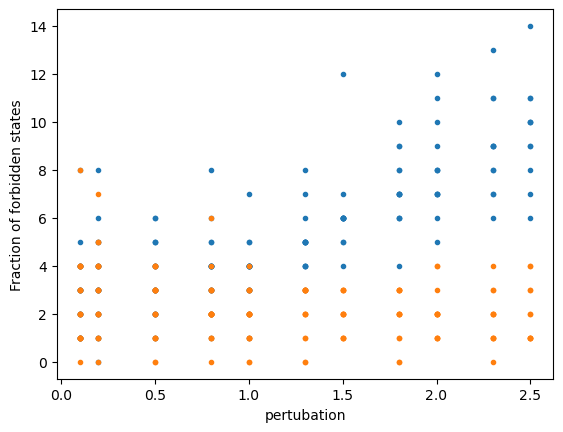

In [4]:
plt.scatter(results[:,0], results[:,3], marker='.')
plt.scatter(results[:,0], results[:,4], marker='.')

plt.xlabel('pertubation')
plt.ylabel('Fraction of forbidden states')
#plt.gca().set_aspect(10, adjustable='box')

plt.savefig('results_forbidden_states_fraction.jpg')
plt.show()

/home/bylehn/ipykernel_698881/3577140198.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(results[:,0], results[:,2], cmap = 'jet', marker='.')


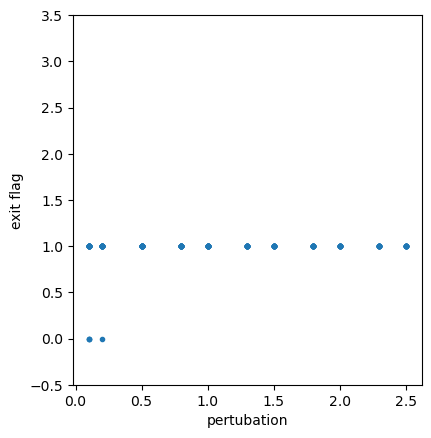

In [5]:
plt.scatter(results[:,0], results[:,2], cmap = 'jet', marker='.')
plt.ylim(-0.5 , 3.5)
plt.xlabel('pertubation')
plt.ylabel('exit flag')
plt.gca().set_aspect(0.7, adjustable='box')

plt.savefig('exit_flags.jpg')
plt.show()